# Importing dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


# Data exposure

In [2]:
print ('train_data sample:')
print (train_data[0])
print ('train_labels sample:')
print (train_labels[0])
print ('train_data shape:')
print (train_data.shape)
print ('train_labels shape:')
print (train_labels.shape)
print ('test_data shape:')
print (test_data.shape)
print ('test_labels shape:')
print (test_labels.shape)

train_data sample:
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
train_labels sample:
3
train_data shape:
(8982,)
train_labels shape:
(8982,)
test_data shape:
(2246,)
test_labels shape:
(2246,)


### Decode the words

In [3]:
def decode_word(sample_word):
    decode_sample_word = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_word]) 
    return decode_sample_word
    # 0 = padding
    # 1 = start of sequence
    # 2 = unknown

word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
sample_word = train_data[0]

print (decode_word(sample_word))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# Preparing Data

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = vectorize_sequences(train_labels, dimension= len(set(train_labels)))
one_hot_test_labels = vectorize_sequences(test_labels, dimension= len(set(train_labels)))
print ('x_train sample:')
print (x_train[0])
print ('x_test sample:')
print (x_test[0])
print ('train labels sample:')
print (one_hot_train_labels[0])
print ('test labels sample:')
print (one_hot_test_labels[0])
print ('x_train shape:')
print (x_train.shape)
print ('one_hot_train_labels shape:')
print (one_hot_train_labels.shape)
print ('x_test shape:')
print (test_data.shape)
print ('one_hot_test_labels shape:')
print (one_hot_test_labels.shape)

x_train sample:
[0. 1. 1. ... 0. 0. 0.]
x_test sample:
[0. 1. 1. ... 0. 0. 0.]
train labels sample:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
test labels sample:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_train shape:
(8982, 10000)
one_hot_train_labels shape:
(8982, 46)
x_test shape:
(2246,)
one_hot_test_labels shape:
(2246, 46)


# Model Create

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

#compile the model
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Validating appoach

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Fit the model

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 89us/step - loss: 2.6175 - accuracy: 0.5063 - val_loss: 1.6899 - val_accuracy: 0.6600
Epoch 2/20
7982/7982 [==============================] - 0s 37us/step - loss: 1.4072 - accuracy: 0.7135 - val_loss: 1.2777 - val_accuracy: 0.7310
Epoch 3/20
7982/7982 [==============================] - 0s 37us/step - loss: 1.0424 - accuracy: 0.7785 - val_loss: 1.1273 - val_accuracy: 0.7710
Epoch 4/20
7982/7982 [==============================] - 0s 37us/step - loss: 0.8166 - accuracy: 0.8264 - val_loss: 1.0455 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 0s 37us/step - loss: 0.6500 - accuracy: 0.8662 - val_loss: 0.9655 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 0s 37us/step - loss: 0.5186 - accuracy: 0.8921 - val_loss: 0.9196 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 0s 37us/step - loss: 0.423

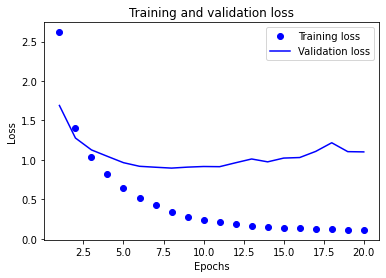

In [18]:
import matplotlib.pyplot as plt

# history_dict = history.history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

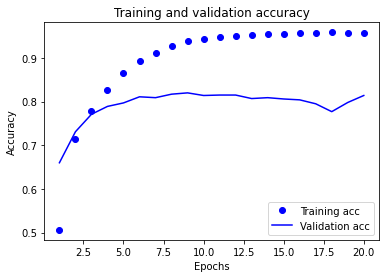

In [19]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']


plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Retrain the model

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

#compile the model
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs= 9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 53us/step - loss: 2.5166 - accuracy: 0.5353 - val_loss: 1.6861 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 0s 40us/step - loss: 1.3903 - accuracy: 0.7076 - val_loss: 1.3002 - val_accuracy: 0.7120
Epoch 3/9
7982/7982 [==============================] - 0s 48us/step - loss: 1.0468 - accuracy: 0.7739 - val_loss: 1.1426 - val_accuracy: 0.7420
Epoch 4/9
7982/7982 [==============================] - 0s 44us/step - loss: 0.8281 - accuracy: 0.8237 - val_loss: 1.0262 - val_accuracy: 0.7800
Epoch 5/9
7982/7982 [==============================] - 0s 41us/step - loss: 0.6566 - accuracy: 0.8638 - val_loss: 0.9703 - val_accuracy: 0.8060
Epoch 6/9
7982/7982 [==============================] - 0s 49us/step - loss: 0.5229 - accuracy: 0.8908 - val_loss: 0.9104 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 0s 45us/step - loss: 0.4202 - acc

# Evaluate the model

In [30]:
print ('Model result:')
print ('loss value: ', results[0])
print ('accuracy value: ', results[1])

Model result:
loss value:  1.0006956298332181
accuracy value:  0.7756010890007019


# Generating predictions on new data

In [23]:
predictions = model.predict(x_test)

print ('Prediction sample result:')
print (predictions[0].shape)

print ('Prediction sample probability sum up:')
print (np.sum(predictions[0]))

print ('PThe highest probability of the result:')
print (np.argmax(predictions[0]))

Prediction sample result:
(46,)
Prediction sample probability sum up:
1.0
PThe highest probability of the result:
3


# The importantance of having sufficiently large intermediate layers

Lets' reduce the intermediate layers from 64 to 4

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

#compile the model
model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

print (history.history)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 66us/step - loss: 3.4540 - accuracy: 0.1817 - val_loss: 3.2098 - val_accuracy: 0.2670
Epoch 2/20
7982/7982 [==============================] - 0s 55us/step - loss: 3.0067 - accuracy: 0.2873 - val_loss: 2.8822 - val_accuracy: 0.2930
Epoch 3/20
7982/7982 [==============================] - 0s 51us/step - loss: 2.6705 - accuracy: 0.3096 - val_loss: 2.5959 - val_accuracy: 0.3230
Epoch 4/20
7982/7982 [==============================] - 0s 39us/step - loss: 2.3631 - accuracy: 0.3365 - val_loss: 2.3252 - val_accuracy: 0.3220
Epoch 5/20
7982/7982 [==============================] - 0s 40us/step - loss: 2.0566 - accuracy: 0.3435 - val_loss: 2.0409 - val_accuracy: 0.3320
Epoch 6/20
7982/7982 [==============================] - 0s 49us/step - loss: 1.7404 - accuracy: 0.4815 - val_loss: 1.7671 - val_accuracy: 0.6500
Epoch 7/20
7982/7982 [==============================] - 0s 37us/step - loss: 1.460

In [31]:
results = model.evaluate(x_test, one_hot_test_labels)
print ('Model result:')
print ('loss value: ', results[0])
print ('accuracy value: ', results[1])

2246/2246 [==============================] - 0s 69us/step
Model result:
loss value:  1.5231615968400203
accuracy value:  0.6767587065696716
